#### Tensorflow Constants

All Ones or all zeros tensors

In [1]:
import tensorflow as tf

In [2]:
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Random tensors

In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.28203374]
 [ 1.6844708 ]
 [-0.8558919 ]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.91693056]
 [0.9053235 ]
 [0.02749801]], shape=(3, 1), dtype=float32)


NumPy arrays are assignable while TensorFlow tensors are not

In [6]:
import numpy as np
x = np.ones(shape=(2, 2))
print(x)
x[0, 0] = 0.
print(x)

[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]


In [7]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: ignored

#### Tensorflow Variables

 Creating a TensorFlow variable

In [8]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.54739875],
       [-1.9359584 ],
       [ 1.3578837 ]], dtype=float32)>


In [9]:
v.assign(tf.ones(shape=(3, 1)))  #use assign method to assign new values to a tf.Variable

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [10]:
v[0, 0].assign(3.)  #It also works for a subset of the coefficients

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [11]:
v.assign_add(tf.ones(shape=(3, 1)))  #assign_add() and assign_sub() are efficient equivalents of += and -=

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

##### Tensor operations: Doing math in TensorFlow

In [12]:
a = tf.ones(shape=(2, 2))
print(a)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [13]:
b = tf.square(a)
print(b)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [14]:
c = tf.sqrt(b)
print(c)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [15]:
d = b + c  #Add two tensors (element-wise).
print(d)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [16]:
e = tf.matmul(a, b)  #Take the product of two tensors
print(e)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [17]:
e *= d  #Multiply two tensors(element-wise).
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


##### The GradientTape API

In [18]:
# finding the gradient of tensorflow variables
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [19]:
# finding the gradient of tensorflow constant
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
 tape.watch(input_const)
 result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [20]:
# nested gradients
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
 with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
 speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

##### An end-to-end example: A linear classifier in pure TensorFlow

First, let’s come up with some nicely linearly separable synthetic data to work with: two classes of points in a 2D plane. We’ll generate each class of points by drawing their coordinates from a random distribution with a specific covariance matrix and a specific mean. Intuitively, the covariance matrix describes the shape of the point cloud, and the mean describes its position in the plane. We’ll reuse the samecovariance matrix for both point clouds, but we’ll use two different mean values—the point clouds will have the same shape, but different positions.

In [21]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
 mean=[0, 3],
 cov=[[1, 0.5],[0.5, 1]],
 size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
 mean=[3, 0],
 cov=[[1, 0.5],[0.5, 1]],
 size=num_samples_per_class)

In [22]:
print(negative_samples)
print(positive_samples)

[[ 0.61602237  3.18059643]
 [-1.4535994   2.58109849]
 [ 0.4444348   3.17631403]
 ...
 [ 0.24744324  3.05422083]
 [-0.23588007  2.95046992]
 [ 0.71629714  4.64643211]]
[[ 3.81441742 -0.29888674]
 [ 2.85590333 -0.73528776]
 [ 2.01094337  0.2076062 ]
 ...
 [ 0.81910176  0.9134838 ]
 [ 2.08296463 -0.53831603]
 [ 5.22872282  1.84135234]]


In the preceding code, negative_samples and positive_samples are both arrays with shape (1000, 2). Let’s stack them into a single array with shape (2000, 2).

In [23]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs)

[[ 0.61602235  3.1805964 ]
 [-1.4535995   2.5810986 ]
 [ 0.4444348   3.176314  ]
 ...
 [ 0.81910175  0.9134838 ]
 [ 2.0829647  -0.538316  ]
 [ 5.228723    1.8413523 ]]


Let’s generate the corresponding target labels, an array of zeros and ones of shape(2000, 1), where targets[i, 0] is 0 if inputs[i] belongs to class 0 (and inversely).

In [24]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


Next, let’s plot our data with Matplotlib.

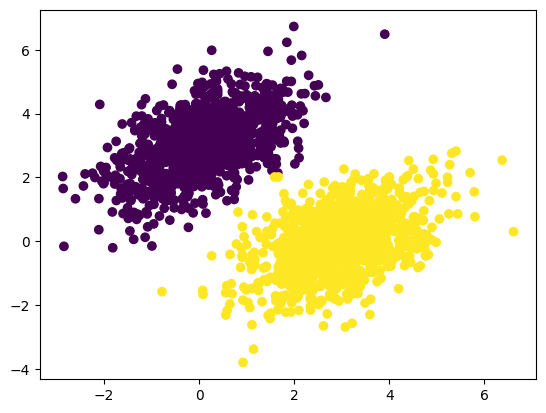

In [25]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Now let’s create a linear classifier that can learn to separate these two blobs. A linear
classifier is an affine transformation (prediction = W • input + b) trained to minimize
the square of the difference between predictions and the targets.

In [26]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.76119506],
       [0.47290683]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


Here’s our forward pass function.

In [27]:
def model(inputs):
    return tf.matmul(inputs, W) + b

Because our linear classifier operates on 2D inputs, W is really just two scalar coefficients, w1 and w2: W = [[w1], [w2]]. Meanwhile, b is a single scalar coefficient. As such,
for a given input point [x, y], its prediction value is prediction = [[w1], [w2]] • [x,
y] + b = w1 * x + w2 * y + b.

The following listing shows our loss function.

In [28]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

Next is the training step, which receives some training data and updates the weights W and b so as to minimize the loss on the data.

In [29]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

For simplicity, we’ll do batch training instead of mini-batch training: we’ll run each training step (gradient computation and weight update) for all the data, rather than iterate over the data in small batches.

In [30]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.9502
Loss at step 1: 0.4823
Loss at step 2: 0.1710
Loss at step 3: 0.1252
Loss at step 4: 0.1126
Loss at step 5: 0.1048
Loss at step 6: 0.0980
Loss at step 7: 0.0919
Loss at step 8: 0.0862
Loss at step 9: 0.0811
Loss at step 10: 0.0763
Loss at step 11: 0.0720
Loss at step 12: 0.0680
Loss at step 13: 0.0644
Loss at step 14: 0.0610
Loss at step 15: 0.0580
Loss at step 16: 0.0551
Loss at step 17: 0.0526
Loss at step 18: 0.0502
Loss at step 19: 0.0480
Loss at step 20: 0.0461
Loss at step 21: 0.0442
Loss at step 22: 0.0426
Loss at step 23: 0.0410
Loss at step 24: 0.0396
Loss at step 25: 0.0383
Loss at step 26: 0.0372
Loss at step 27: 0.0361
Loss at step 28: 0.0351
Loss at step 29: 0.0342
Loss at step 30: 0.0333
Loss at step 31: 0.0326
Loss at step 32: 0.0319
Loss at step 33: 0.0312
Loss at step 34: 0.0306
Loss at step 35: 0.0301
Loss at step 36: 0.0296
Loss at step 37: 0.0291
Loss at step 38: 0.0287
Loss at step 39: 0.0283


After 40 steps, the training loss seems to have stabilized around 0.028. Let’s plot how
our linear model classifies the training data points. Because our targets are zeros and
ones, a given input point will be classified as “0” if its prediction value is below 0.5, and
as “1” if it is above 0.5

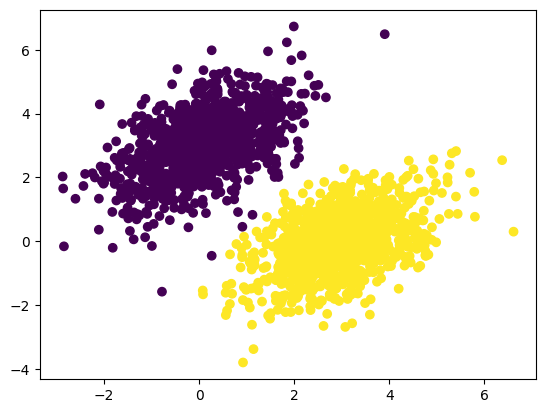

In [31]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Recall that the prediction value for a given point [x, y] is simply prediction ==
[[w1], [w2]] • [x, y] + b == w1 * x + w2 * y + b. Thus, class 0 is defined as w1 * x + w2 * y + b < 0.5, and class 1 is defined as w1 * x + w2 * y + b > 0.5. You’ll notice that what you’re looking at is really the equation of a line in the 2D plane: w1 * x + w2 * y + b = 0.5.
Above the line is class 1, and below the line is class 0. You may be used to seeing line equations in the format y = a * x + b; in the same format, our line becomes y = - w1 / w2 * x + (0.5 - b) / w2.

Let’s plot this line

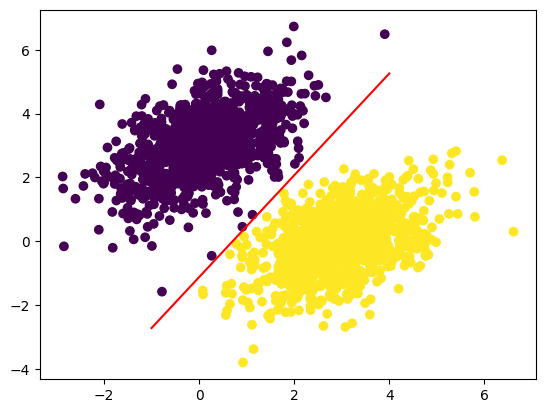

In [33]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)